# 1. Principal Component Analysis 
One of the most used techniques when performing dimensionality reduction is **principal component analysis**. 

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style("ticks")


In [28]:
num_points = 100
x_1 = np.linspace(0, 6, num_points)
noise = np.random.normal(0,1,num_points)
x_2 = 2*x_1 + noise

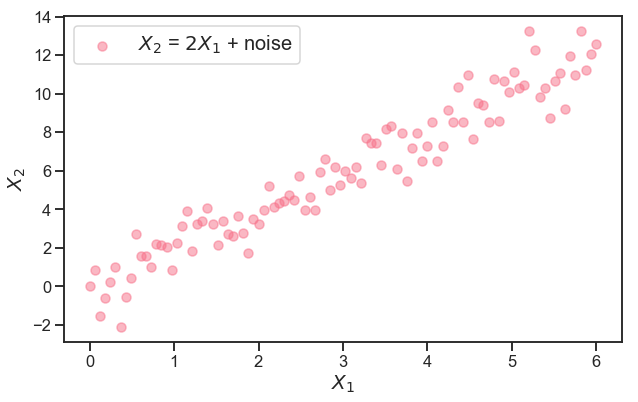

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
    
plt.scatter(x_1, x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('$X_1$', fontsize=20)
ax.set_ylabel('$X_2$', fontsize=20)

plt.show()

We then want to center the data so that the origin is dead in the center of the data cloud. To do this, we simply subtract the mean from each dimension. 

In [30]:
mu_x_1 = x_1.mean()
mu_x_2 = x_2.mean()
print('Mean of x_1: ', mu_x_1, '\nMean of x_2: ', mu_x_2)

Mean of x_1:  3.0 
Mean of x_2:  5.918930606597862


In [31]:
centered_x_1 = x_1 - mu_x_1
centered_x_2 = x_2 - mu_x_2

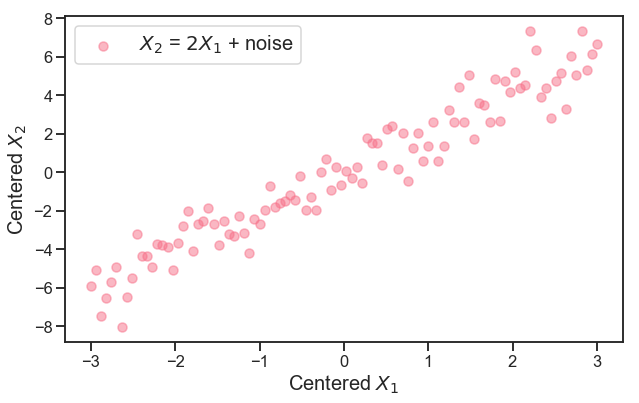

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

We can now compute the covariance matrix $\Sigma$. The covariance between two attributes is essentially an indication as to whether they change together or in opposite directions. The covariance matrix is defined as:

$$cov(X_1,X_2) = E \big[(X_1 - E[X_1])(X_2 - E[X_2])\big]$$

Where $E$ is the expected value, and hence in this case the mean. This allows us to rewrite the above as:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - E[X_1])(X_2^i - E[X_2])$$

And $E[X_1]$ is simply the expected value of $X_1$, in which case as a random variable that simplifies to the mean of X_1, $\mu_{X_1}$. The same goes for $X_2$:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - \mu_{X_1})(X_2^i - \mu_{X_2})$$

Finally, remember that we already have centered the data by subtracting the mean in the prior step, so that is no longer necessary, reducing our equation to:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i)(X_2^i)$$

Now, one final point: when calculating the covariance matrix we will need to determine how $X_1$ varies with $X_2$, but also how $X_2$ varies with $X_1$ (they will be the same), and then how $X_1$ and $X_2$ vary with themselves (the variance). We can write a simple function to do just that:

In [33]:
def calculate_covariance(a,b):
    """a and b are both numpy arrays."""
    return (a*b).sum() / len(a)

In [34]:
print('Covariance between X_1 and X_2: ', calculate_covariance(centered_x_1, centered_x_2))
print('Covariance between X_2 and X_1: ', calculate_covariance(centered_x_2, centered_x_1))
print('Variance between X_1 and X_1: ', calculate_covariance(centered_x_1, centered_x_1))
print('Variance between X_2 and X_2: ', calculate_covariance(centered_x_2, centered_x_2))

Covariance between X_1 and X_2:  6.254924116892471
Covariance between X_2 and X_1:  6.254924116892471
Variance between X_1 and X_1:  3.0606060606060606
Variance between X_2 and X_2:  13.783086211956748


We can quickly compare our results to the built in covariance matrix function, `np.cov`, supplied from numpy:

In [35]:
covariance_matrix = np.cov(centered_x_1, centered_x_2, bias=True)
print('Numpy calculated covariance matrix: \n', covariance_matrix)

Numpy calculated covariance matrix: 
 [[ 3.06060606  6.25492412]
 [ 6.25492412 13.78308621]]


Looks like our function lines up perfectly. For a quick sanity check, do these values make sense? We have found a variance of 3.06 for $X_1$ and 13.9 for $X_2$. That seems reasonable, considering our points are clearly more spread out in $X_2$. And we then found a positive covariance of 6.17 when relating $X_1$ to $X_2$; this also makes sense considering our points do clearly seem to co-vary positively. 

## Multiplying by the covariance matrix
Now, let's say for a moment that we have the following vectors (red, green, and blue below), which correspond to our points in the cartesian plane:

```
vector_red = np.array([[-0.4], [0.6]])   # (-0.4, 0.6)
vector_green = np.array([[.85], [-0.6]]) # (0.85, -0.6)
vector_blue = np.array([[0.05], [-2.0]]) # (0.05, -2.0) 
```

In [36]:
colors = ['r', 'g', 'b']
vector_red = np.array([[-0.4], [0.6]])
vector_green = np.array([[.85], [-0.6]])
vector_blue = np.array([[0.05], [-2.0]])
vectors = [[vector_red, vector_green, vector_blue]]

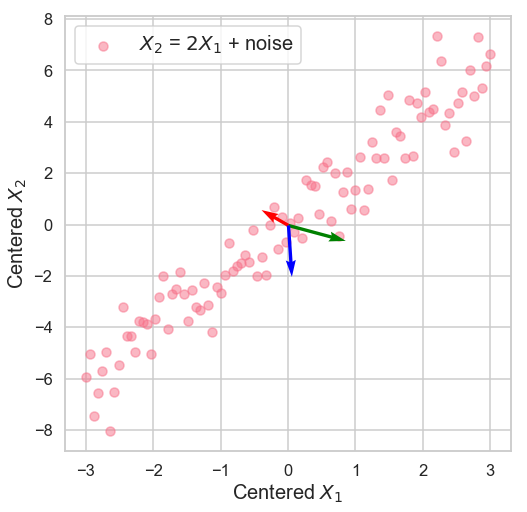

In [40]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

for idx, v in enumerate(vectors[0]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]])

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Now, we had just found the covariance matrix a moment ago. What would the result be if we transformed our vectors above by the covariance matrix (via a matrix multiplication)? Let's take a look:

In [41]:
vectors.append([covariance_matrix.dot(v) for v in vectors[-1]])

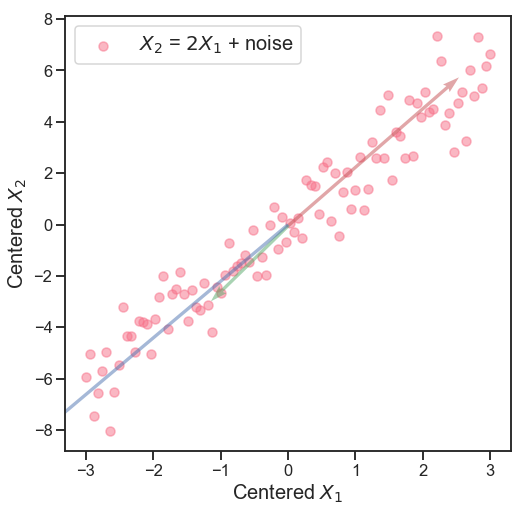

In [46]:
sns.set(style="white", palette="husl")
sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

for idx, v in enumerate(vectors[-1]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Ahh! Very interesting; it appears as though that transformation seemed to turn our vectors towards the direction of greatest variance in the data. Let's perform that matrix multiplication a second time (on the transformed vectors):

In [47]:
vectors.append([covariance_matrix.dot(v) for v in vectors[-1]])

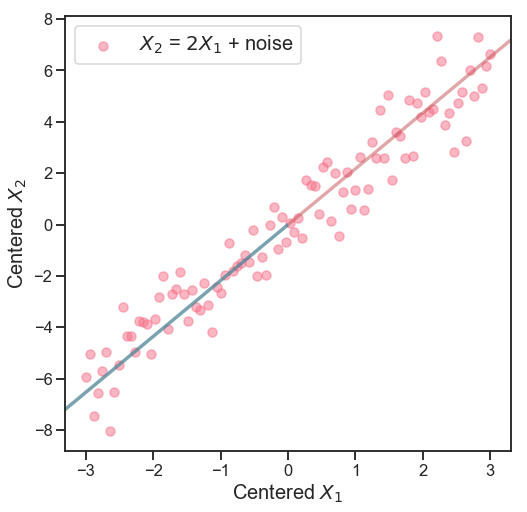

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

for idx, v in enumerate(vectors[-1]):
    ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

Our vectors seems to be be perfectly in line with the direction of greatest variance now! It seems to be that our vectors were rotated in the direction of greatest variance, while subsequently having a greater magnitude after each transformation! Now, what is equally interesting is that our vectors appear to be _converging_ to a specific slope! Let's take a look at each vector:

In [49]:
for idx, color in enumerate(['Red', 'Green', 'Blue']):
    print('\n'+ color + 'Vector: ')
    for i in range(len(vectors)):
        print(f'Slope at t = {i}: ', vectors[i][idx][1][0] / vectors[i][idx][0][0] )


RedVector: 
Slope at t = 0:  -1.4999999999999998
Slope at t = 1:  2.2809564615254674
Slope at t = 2:  2.1753199856187067

GreenVector: 
Slope at t = 0:  -0.7058823529411765
Slope at t = 1:  2.564760626164794
Slope at t = 2:  2.1779440171485933

BlueVector: 
Slope at t = 0:  -40.0
Slope at t = 1:  2.205537572115419
Slope at t = 2:  2.1745297160461163


We can clearly see that they each are converging to a specific slope, `~2.15`. So the slope is cleary getting closer and closer to _something_, and if we look at our plot we can see that that is what we would pick out as the dimension of greatest variance. Put another way, it is the dimension where the data points seem to be spread out the most. 

This is definitely an interesting behavior; we have taken a random vector(s), multiplied them by the covariance matrix, and that appears to have turned it towards the dimension of the greatest variance. 

So, we can see that by iteratively multiplying these random vectors by the covariance matrix we have found the dimension of greatest variance that we would have also found via visual inspection. There is another way that we can go about this though! What we are actually looking for are vectors that are not _turned_ when multiplied by the covariance matrix. By definition those are simply our **eigenvectors**! The eigenvector equation can be seen below:

$$\Sigma v = \lambda v$$

Here we transform a vector $v$ by the covariance matrix, $\Sigma$, and if $v$ is an eigenvector it simply is _scaled_ by its eigenvalue (and not rotated). Another way to think about this is that $v$ remains on its _span_. So, what we have come to discover is that our principal components are actually our eigenvectors with the largest eigenvalues! 

### Finding the Eigenvalues and Eigenvectors
So, how do we actually go about finding the eigenvalues and eigenvectors? The mechanical process of doing so by hand is covered in any introductory linear algebra course and countless tutorials, and to be honest not entirely enlightening. We will do so below via numpy's `linalg.eig(A)` function:

In [50]:
e_val, e_vec = np.linalg.eig(covariance_matrix)
print('Eigen Values: ', e_val)
print('Eigen Vectors: ', e_vec)

Eigen Values:  [ 0.18370491 16.65998736]
Eigen Vectors:  [[-0.90851052 -0.41786198]
 [ 0.41786198 -0.90851052]]


We can then see where they land in our plot:

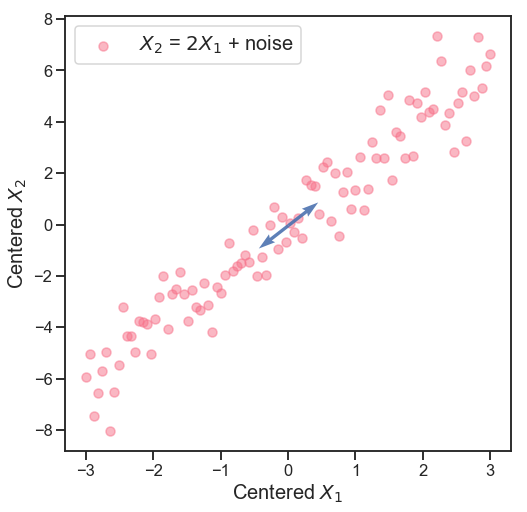

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)


ax.quiver([0], [0], [0.44], [0.897], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.9)
ax.quiver([0], [0], [-0.44], [-0.897], angles='xy', scale_units='xy', scale=1, color=[colors[idx]], alpha=0.9)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

## Why are Eigenvectors in along the direction of greatest variance?
At this point the following question surely must be going through your mind:

> Why does the eigenvector represent the direction of greatest variance? 

To determine this we are going to look at the visualization below. For now, we are going to just assume that the vector $e$ is just any vector (although, we are going to prove that it is our eigenvector). We are going to be projecting our points, $x_1, x_2, x_3$, onto the vector $e$. We are then going to be measuring the _variance_ of the projections. What exactly does that mean? Well, we have three data points in the original space, and they can be projected into the space associated with $e$ by doing a dot product (the projections are shown via dotted lines). By definition, the dot product is:

$$x^T \cdot e = \sum_{j=1}^d x_{ij} e_j$$

It will result in a _single number_ which tells us _where_ the projection is along $e$. This number is a scalar, not a vector. In our case it looks like our projects result in the numbers ~$1, 3, 3.5$, which makes calculating the variance very easy. 

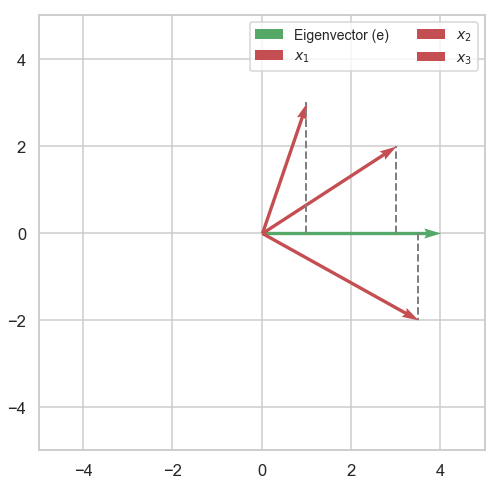

In [57]:
sns.set_style("whitegrid")
sns.set_context("talk", rc={"lines.linewidth": 2})
fig, ax = plt.subplots(figsize=(8,8))

ax.quiver([0], [0], [4], [0], angles='xy', scale_units='xy', scale=1, color=['g']) # e 
ax.quiver([0], [0], [1], [3], angles='xy', scale_units='xy', scale=1, color=['r']) # x1
ax.quiver([0], [0], [3], [2], angles='xy', scale_units='xy', scale=1, color=['r']) # x2
ax.quiver([0], [0], [3.5], [-2], angles='xy', scale_units='xy', scale=1, color=['r']) # x3

plt.vlines(1, ymin=0, ymax=3, linestyle='--', color='grey') # x1 proj
plt.vlines(3, ymin=0, ymax=2, linestyle='--', color='grey') # x2 proj
plt.vlines(3.5, ymin=0, ymax=-2, linestyle='--', color='grey') # x3 proj

ax.legend(['Eigenvector (e)', r'$x_1$', r'$x_2$', r'$x_3$'], fontsize=14, ncol=2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

The standard definition for variance is:

$$\frac{1}{n} \sum_{k=1}^n \Big(x_k - \mu\Big)^2$$

And in our case we know that each specific $x_k$ (the resulting projection of $x_i$ onto $e$) is calculated via the dot product from above. That leaves us with a final variance equation of:

$$\frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j - \mu\Big)^2$$

Now, what I want to claim for a moment is that the above equation is the same thing as:

$$\frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j - \mu\Big)^2 = \frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j\Big)^2$$

This is because mean is going to be 0, which we are going to prove shortly. For now though, we have an equation for variance, and we know that we want to make this variance _as large as possible_; in other words, pick the vector $e$ that maximize's the variance:

$$V = \frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j\Big)^2$$

Generally, performing an optimization (maximizing or minimizing something) on an equation that is differentiable would be done by taking the derivative, set it equal to 0, solve, and see what the resulting value is (a minimum or maximum). However, we run into an issue in our scenario; if we don't place a contstraint on the above formula, then the variance can be maximized trivialy by just making $e$ unbelievably massive. To prevent this, we will place a **constraint** on the vector $e$. The best way to do that is to _cap the length_ of the vector, to be 1 (unit length):

$$||e|| = 1$$

This prevents just placing arbitrarily large numbers in there. Visually this can be see as:

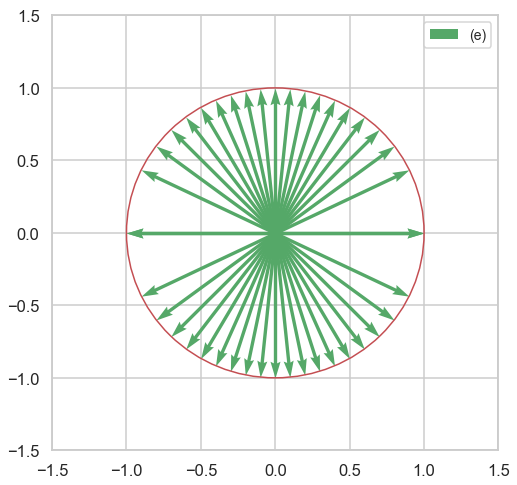

In [123]:
sns.set_style("whitegrid")
sns.set_context("talk", rc={"lines.linewidth": 2})
fig, ax = plt.subplots(figsize=(8,8))

unit_circle = plt.Circle((0, 0), 1, color='r', fill=False)
ax.add_artist(unit_circle)    

a = np.arange(-1,1.1,.1)
b = np.sqrt(1 - a**2)

for a_val, b_val in zip(a,b):
    ax.quiver([0], [0], [a_val], [b_val], angles='xy', scale_units='xy', scale=1, color=['g']) 
    ax.quiver([0], [0], [-a_val], [-b_val], angles='xy', scale_units='xy', scale=1, color=['g'])
    
ax.legend(['(e)'], fontsize=14, ncol=2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

The constraint, $||e|| = 1$, is shown via the red circle. Our problem has now been transformed into: find the vector $e$ from those above that _maximizes_ the variance of the projections. 

This new constraint will make maximization a bit more difficult, specifically we are going to need to add a **lagrange multiplier**, in order to make sure that the solution is unit length. This leaves us with the resulting equation:

$$V = \frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j\Big)^2 - \overbrace{\lambda \Big( \big( \sum_{k=1}^d e_j^2\big) - 1\Big)}^\text{Lagrange Multiplier}$$

In case you are not familiar with the lagrange multiplier, a brief overview is below. If you are familiar, feel free to just skip past it.

### Lagrange Multiplier
The Lagrange Multiplier is a technique that allows you to find the min/max of a multivariable function, _when there is a constraint on the input values you can you_. For example, let's say that we wanted to find the maximum value of:

$$f(x, y) = 2x + y$$

Visually, that is a 2-dimensional sheet sitting in 3-dimensional space:

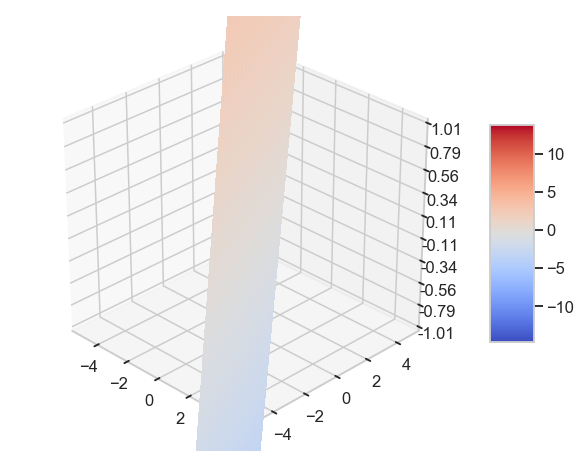

In [120]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 2*X + Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(azim=-45)
plt.show()

In this case, a maximization can be achieved just by picking infinite values for $x$ and $y$. However, what if we add the following constraint:

$$g(x,y) = c$$

Where $g(x,y)$ is $x^2 + y^2$, and $c=1$, leaving us with:

$$x^2 + y^2 = 1$$

Visually, this would be:

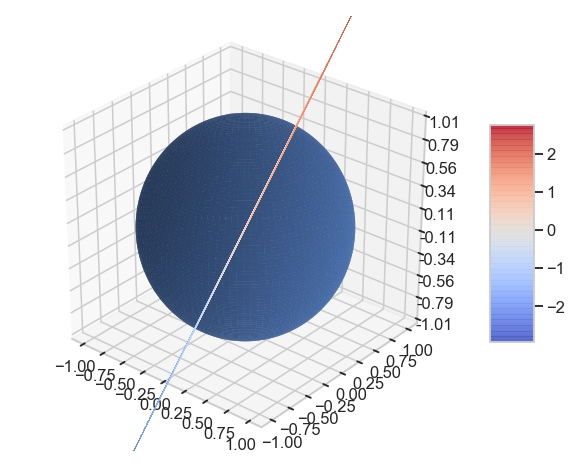

In [165]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')


# Make data.
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 2*X + Y

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, linewidth=0, antialiased=False)

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x_1 = r*sin(phi)*cos(theta)
y_1 = r*sin(phi)*sin(theta)
z_1 = r*cos(phi)

surf2 = ax.plot_surface(
    x_1, y_1, z_1,  rstride=1, cstride=1, color='b', linewidth=0)



# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(azim=-50)
plt.show()

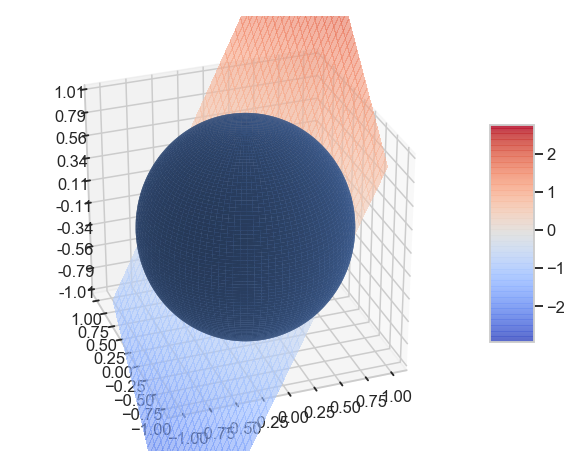

In [174]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')


# Make data.
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 2*X + Y

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, linewidth=0, antialiased=False)

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x_1 = r*sin(phi)*cos(theta)
y_1 = r*sin(phi)*sin(theta)
z_1 = r*cos(phi)

surf2 = ax.plot_surface(
    x_1, y_1, z_1,  rstride=1, cstride=1, color='b', linewidth=0)


# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(azim=-110)
plt.show()

So, we can see clearly that the point at which $f$ is maximized, subject to this constraint, is the highest point where the sphere, $g$, intersects $f$. Now, if we think about the **gradient** where $f$ and $g$ intersect, we can extend that to reasoning about the contour lines of $f$ and the contour lines of $g$ being _tangent_.

That is easy enough to process, but what exactly can we do with it? Well, if we bring back the gradient ($\nabla f$), we know that the gradient of $f$ evaluate at a point $(x_0, y_0)$ will always give a vector perpendicular to the countour line passing through that point. This means that when $f$ and $g$ are tangent, their gradient vectors are parallel. Now, we do not know the magnitude of each of these gradient vectors, but because we know that they point in the same direction at the point $(x_0, y_0)$, we can multiply one by a constant to get the other. This looks like:

$$\nabla f(x_0, y_0) = \lambda_0 \nabla g(x_0, y_0)$$

In our particular example, we can work out the math as follows:

$$\nabla f(x,y) = 
\begin{bmatrix}
    \frac{\partial}{\partial x} (2x + y) \\
    \frac{\partial}{\partial y} (2x + y)
\end{bmatrix} = 
\begin{bmatrix}
    2 \\
    1
\end{bmatrix} 
$$

$$\nabla g(x,y) = 
\begin{bmatrix}
    \frac{\partial}{\partial x} (x^2 + y^2 - 1) \\
    \frac{\partial}{\partial y} (x^2 + y^2 - 1) 
\end{bmatrix} = 
\begin{bmatrix}
    2x \\
    2y
\end{bmatrix} 
$$

Leaving us with a tangency condition of:

$$\begin{bmatrix}
    2 \\
    1
\end{bmatrix} = 
\lambda_0
\begin{bmatrix}
    2x_0 \\
    2y_0
\end{bmatrix} 
$$

We now have three equations:

$$x_0^2 + y_0^2 = 1$$

$$2 \lambda_0 x_0$$

$$2 \lambda_0 y_0$$

And three unknowns: $\lambda_0, x_0, y_0$

Which is a perfectly solvable situation. Now, where Lagrange came in was that he took the above scenario and created a special function from which all 3 equations above could be found. It looked like:

$$L(x,y,\lambda) = f(x,y) - \lambda(g(x,y) - c)$$

### Back to Eigenvectors...
Based on the above, it is fairly straight forward to see how our equation was determined:

$$V = \frac{1}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j\Big)^2 - \overbrace{\lambda \Big( \big( \sum_{k=1}^d e_j^2\big) - 1\Big)}^\text{Lagrange Multiplier}$$

Our constraint was equal to $1$, and our function $g$ was that representing the length of $e$. Now, we can take the derivative of the above equation and set it equal to 0:

$$\frac{\partial V}{\partial e_a} = \frac{2}{n} \sum_{i=1}^n \Big(\sum_{j=1}^d x_{ij} e_j\Big)x_{ia} - 2\lambda e_a = 0$$

Note that we are differentiating with respect to components of $e$. So, $e_a$ is the value of $e$ for attribute $a$. Hence, the above equation is representing the derivative for just one coordinate, but we will have many. As a next step, we can move things around as follows:

$$2 \sum_{j=1}^d e_j \Big( \frac{1}{n} \sum_{i=1}^n x_{ia} x_{ij}\Big) = 2\lambda e_a$$

The sums can be swapped since everything is linear. $e_j$ is moved outside of the inner sum since it does not depend on $i$, and is effectively a constant inside of that sum. We end up with the sum over $i$'s, which are our instances in the dataset, and we take the value of the $a$th attribute multiply it by the value of the $j$th attribute, and add the values up. This is the definition of the **covariance** between attribute $a$ and $j$. 

$$2 \sum_{j=1}^d e_j \overbrace{\Big( \frac{1}{n} \sum_{i=1}^n x_{ia} x_{ij}\Big)}^\text{covariance of a,j} = 2\lambda e_a$$

Keep in mind that we have one of the above equations for all attributes $a$, where $a$ is in $1..d$. Our entire equation set looks like:

$$
\begin{bmatrix}
    \sum_{j=1}^d cov(1,j) e_j = \lambda e_1 \\
    \vdots \\
    \sum_{j=1}^d cov(d,j) e_j = \lambda e_d
\end{bmatrix} 
$$

We have a sum from $j=1..d$, which is a sum over all of our attributes, then we have the covariance of the first attribute with $j$ times the value of $j$ in our vector $e$, which is then equal to $\lambda$, the lagrange multiplier, times $e_1$, the value of the first attribute in the vector. Another way to view it is that we are taking the first row of the covariance matrix $cov(1,j)$ (for all $j$, thanks to the sum), and taking the dot product with $e$: This could also be written without the summations:

$$cov(1, :) \cdot e$$

So, we see that the first row of the covariance matrix dotted with vector $e$ is the first component of vector $e$ times the lagrange multiplier. This is then repeated for all attributes $1..d$. Which, if we rewrite this in matrix notation and drop the sums, we end up with:

$$\sum e = \lambda e$$

Which is the eigenvector/value equation that we have seen before! Hence, $e$ _must_ be an eigenvector! So, we have just proved that the way to maximize the variance of our projections is to project onto an _eigenvector_. Curiously enough, our lagrange multiplier ends up being and eigenvalue. 

## Eigenvalue is the variance along the Eigenvector